<h1 style="text-align: center"> Assignment 2 Part A: The Importance of Service in Building Customer Loyalty for Car Dealerships </h1>

### Savinay Singh 
### Student ID: <b><u>24591935</u></b>
### 27 April 2023


<p style="font-size:18px;">Table of Content
<ol>
    <li>Importing the libraries</li>
    <li>Importing the dataset</li>
    <ul>
        <li>About the dataset</li>
    </ul>
    <li>Feature Selection</li>
    <li>Data Preprocessing</li>
    <ul>
        <li>Handling the missing data</li>
    </ul>
    <li>Intitial Data Visualisation</li>
    <li>Train Test Split</li>
    <li>Handling Class Imbalance</li>
    <li>Final Data Visualisation</li>
    <li>Feature Scaling</li>
    <li>Modelling and Evaluation</li>
  
   
</ol>
</p>

# 1. Importing the libraries

<p style="font-size:18px;">
    To utilise the pre-written code and functionality the libraries given below are imported. 
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency
import statsmodels.api as sms

# 2. Importing the dataset

In [3]:
df=pd.read_csv('./repurchase_training.csv')

## 2.1. About the dataset

<p style="font-size:18px;">
    The dataset for this experiment includes information on customers who have re-purchased a car in the past, along with details on their service history and any other relevant data points. There are seventeen input parameters such as age band, gender, car model, car segment, etc. The dataset includes categorical features only, and out of these features, eleven are divided into ten equal intervals, also known as deciles. 
</p>

In [4]:
str_about_data='''ID: Unique ID of the customer

target: Model target. 1 if the customer has purchased more than 1 vehicle, 0 if they have only purchased 1.

age_band: Age banded into categories

gender: Male, Female or Missing

car_model: The model of vehicle, 18 models in total

car_segment: The type of vehicle

age_of_vehicle_years: Age of their last vehicle, in deciles

sched_serv_warr: Number of scheduled services (e.g. regular check-ups) used under warranty, in deciles

non_sched_serv_warr: Number of non-scheduled services (e.g. something broke out of the service cycle) used under warranty, in deciles

sched_serv_paid: Amount paid for scheduled services, in deciles

non_sched_serv_paid: Amount paid for non scheduled services, in deciles

total_paid_services: Amount paid in total for services, in deciles

total_services: Total number of services, in deciles

mth_since_last_serv: The number of months since the last service, in deciles

annualised_mileage: Annualised vehicle mileage, in deciles

num_dealers_visited: Number of different dealers visited for servicing, in deciles

num_serv_dealer_purchased: Number of services had at the same dealer where the vehicle was purchased, in deciles'''

In [5]:
dict_about_data=dict(zip([x.split(':')[0] for x in str_about_data.split('\n\n')],[x.split(':')[1] for x in str_about_data.split('\n\n')]))

In [6]:
dict_about_data

{'ID': ' Unique ID of the customer',
 'target': ' Model target. 1 if the customer has purchased more than 1 vehicle, 0 if they have only purchased 1.',
 'age_band': ' Age banded into categories',
 'gender': ' Male, Female or Missing',
 'car_model': ' The model of vehicle, 18 models in total',
 'car_segment': ' The type of vehicle',
 'age_of_vehicle_years': ' Age of their last vehicle, in deciles',
 'sched_serv_warr': ' Number of scheduled services (e.g. regular check-ups) used under warranty, in deciles',
 'non_sched_serv_warr': ' Number of non-scheduled services (e.g. something broke out of the service cycle) used under warranty, in deciles',
 'sched_serv_paid': ' Amount paid for scheduled services, in deciles',
 'non_sched_serv_paid': ' Amount paid for non scheduled services, in deciles',
 'total_paid_services': ' Amount paid in total for services, in deciles',
 'total_services': ' Total number of services, in deciles',
 'mth_since_last_serv': ' The number of months since the last se

In [7]:
pd.DataFrame.from_dict(dict_about_data,orient='index')

,0
ID,Unique ID of the customer
target,Model target. 1 if the customer has purchased...
age_band,Age banded into categories
gender,"Male, Female or Missing"
car_model,"The model of vehicle, 18 models in total"
car_segment,The type of vehicle
age_of_vehicle_years,"Age of their last vehicle, in deciles"
sched_serv_warr,Number of scheduled services (e.g. regular ch...
non_sched_serv_warr,Number of non-scheduled services (e.g. someth...
sched_serv_paid,"Amount paid for scheduled services, in deciles"


<pre style="font-size:18px;">
    <h2>Data Privacy Risks</h2>
    Repurchase data can be utilised for targeted marketing initiatives, which some customers may find intrusive or unwanted. Customers' privacy may have been violated if their information was utilised for marketing without their explicit permission.
    
    Thre is no mention of any sensitive information such as vehicle identification number (VIN) or Personal Identifiable Information (PII) in the dataset
</pre>

# 3. Feature Selection

<p style="font-size:18px;">
    Only selecting the features that are related to the Service of a car
</p>

In [8]:
df.columns

Index(['ID', 'Target', 'age_band', 'gender', 'car_model', 'car_segment',
       'age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased'],
      dtype='object')

In [9]:
df=df[['Target','sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services','mth_since_last_serv','num_dealers_visited', 'num_serv_dealer_purchased']]

## Checking feature's association with the Target variable using Cramer's V

<p style="font-size:18px;">
    None of the features above show a high association with the target variable as the Cramer's V is less than 0.5 for all
</p>

In [10]:
for x in ['sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services','mth_since_last_serv','num_dealers_visited', 'num_serv_dealer_purchased']: 
    # create a contingency table of the two variables
    cont_table = pd.crosstab(df['Target'], df[x])

    # compute the chi-squared test statistic and p-value
    chi2_stat, p_val, dof, exp_freq = chi2_contingency(cont_table)

    # compute the Cramer's V measure from the chi-squared test statistic
    n_obs = df.shape[0]
    n_cells = cont_table.size
    v_cramer = np.sqrt(chi2_stat / (n_obs * (min(n_cells, 2) - 1)))

    print('Cramer\'s V for {}:'.format(x), v_cramer)

Cramer's V for sched_serv_warr: 0.20831948084928478
Cramer's V for non_sched_serv_warr: 0.10719218357652521
Cramer's V for sched_serv_paid: 0.19780823766602512
Cramer's V for non_sched_serv_paid: 0.03323948277763405
Cramer's V for total_paid_services: 0.09249165604216902
Cramer's V for total_services: 0.205533865172324
Cramer's V for mth_since_last_serv: 0.1618611072485944
Cramer's V for num_dealers_visited: 0.0751352281680618
Cramer's V for num_serv_dealer_purchased: 0.06474354032274657


# 4. Data-Preprocessing

## 4.1. Handling the missing data

<p style="font-size:18px;">
    There are no missing values in the selected features
</p>

In [11]:
df.isna().sum()

Target                       0
sched_serv_warr              0
non_sched_serv_warr          0
sched_serv_paid              0
non_sched_serv_paid          0
total_paid_services          0
total_services               0
mth_since_last_serv          0
num_dealers_visited          0
num_serv_dealer_purchased    0
dtype: int64

<BarContainer object of 10 artists>

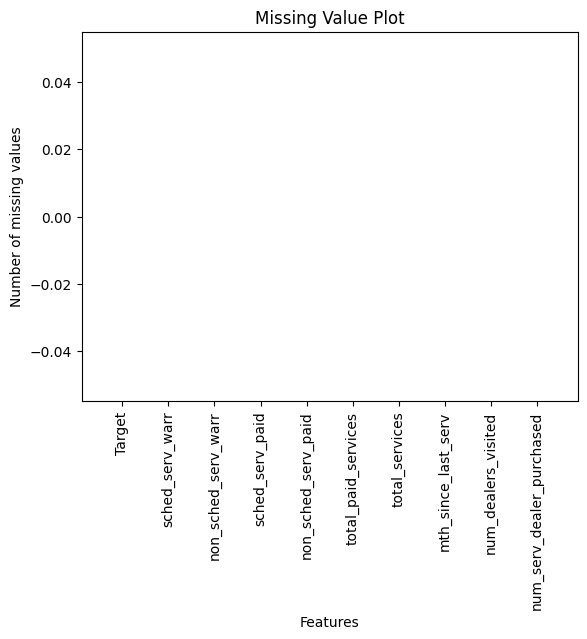

In [12]:
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Number of missing values')
plt.title('Missing Value Plot')
plt.bar(df.isna().sum().index,df.isna().sum().values)

# 5. Initial Data Visualisation 

<p style="font-size:18px;">
    The grouped bar chart below displays different categories of a feature with each set of bars representing a specific category, and each bar within the set indicating the target value associated to that category.
</p>

In [13]:
X=df.drop('Target',axis=1)

In [14]:
assert X.shape==(131337, 9)

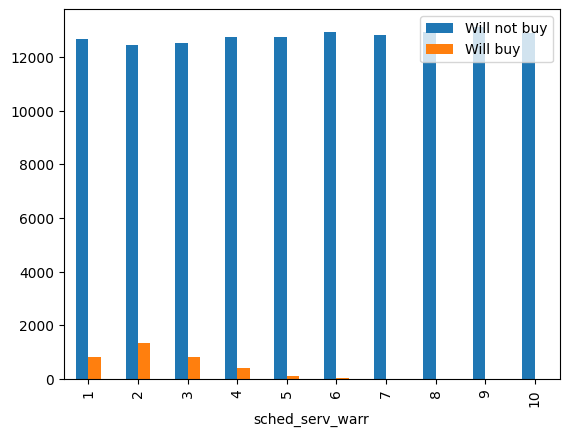

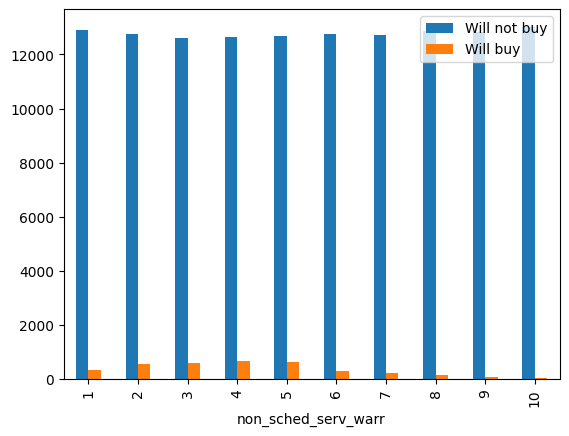

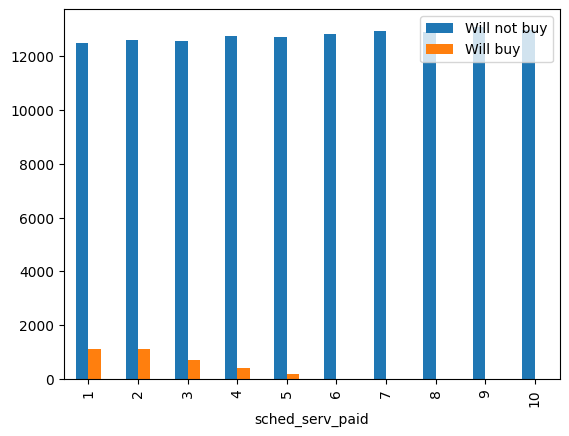

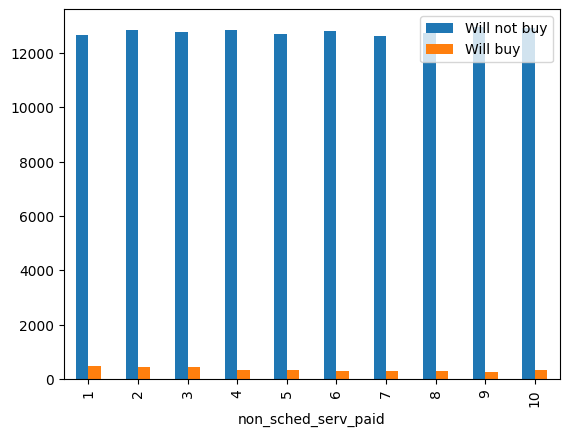

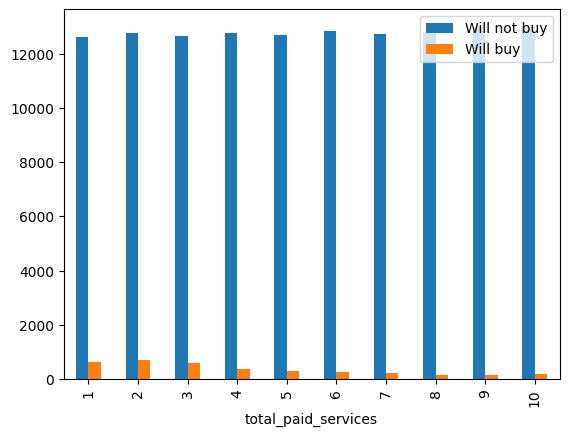

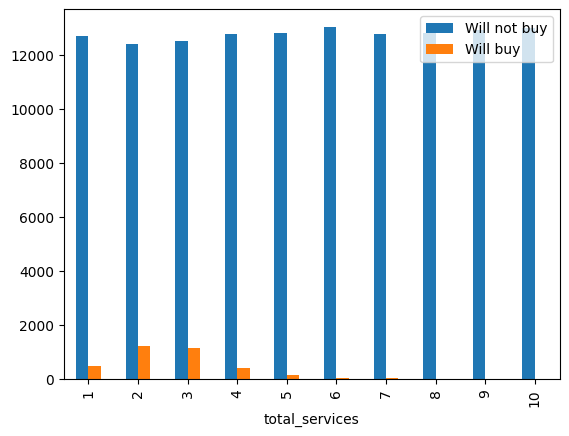

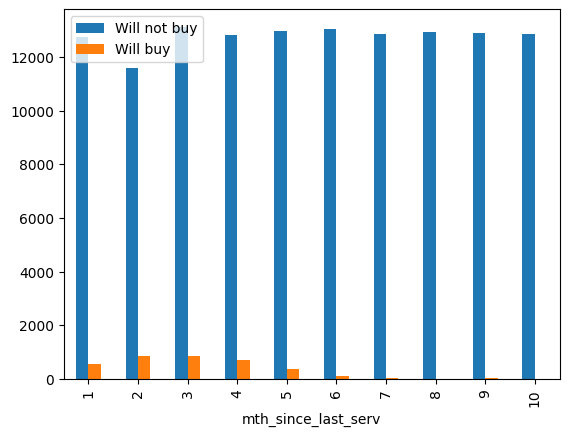

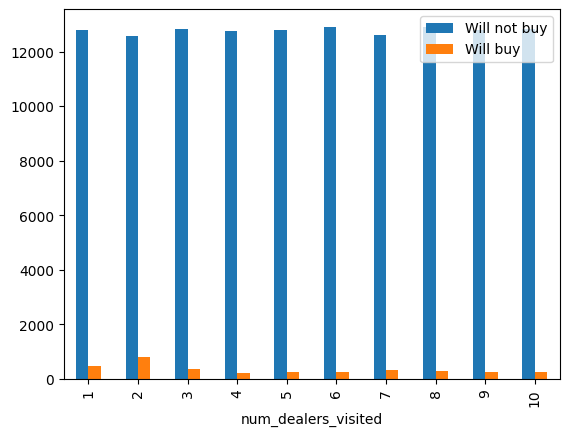

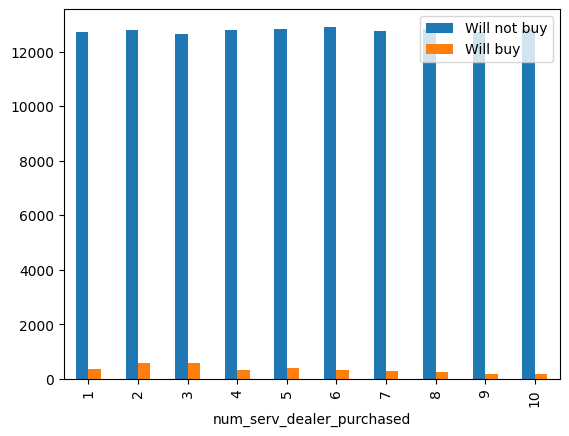

In [15]:
for col in X:
    df_serv=pd.DataFrame(df[df.Target==0].groupby(by=col).count().Target)
    df_serv.columns=[ 'Will not buy']
    df_serv['Will buy']=df[df.Target==1].groupby(by=col).count().Target
    df_serv.plot(kind='bar')

# 6. Train Test Split

In [16]:
X=df.drop('Target',axis=1)
y=df.Target

In [17]:
assert X.shape==(131337, 9)
assert y.shape==(131337, )

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
assert X_train.shape==(87995, 9)
assert y_train.shape==(87995,)
assert X_test.shape==(43342, 9)
assert y_test.shape==(43342,)

# 7. Handling the class imbalance

<p style="font-size:18px;">
    SMOTE is a technique used here to generate synthetic samples for the minority class by interpolating between neighboring examples. This helps to balance the distribution of classes and improve the performance of the model.
</p>

In [20]:
y_train.value_counts()

0    85622
1     2373
Name: Target, dtype: int64

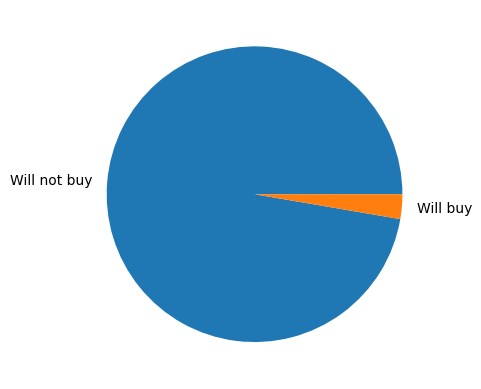

In [21]:
plt.pie(y_train.value_counts(),labels=['Will not buy','Will buy'])
plt.show()

In [22]:
sm = SMOTE(random_state=42)

In [23]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [24]:
y_train_sm.value_counts()

0    85622
1    85622
Name: Target, dtype: int64

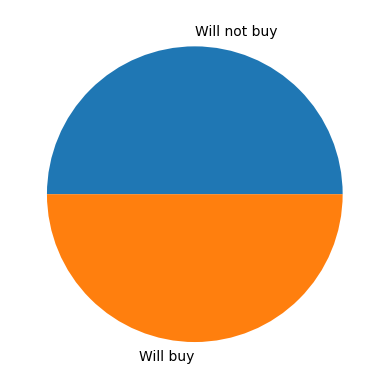

In [25]:
plt.pie(y_train_sm.value_counts(),labels=['Will not buy','Will buy'])
plt.show()

# 8. Final Data Visualisation

<p style="font-size:18px;">
    The grouped bar chart below displays different categories of a feature with each set of bars representing a specific category, and each bar within the set indicating the target value associated to that category.
</p>

<p style="font-size:18px;">
    It shows that less no. of scheduled/non scheduled services and less amount paid for services brings customer retention.
</p>

In [26]:
df2_train=X_train_sm.copy()
df2_train['Target']=y_train_sm

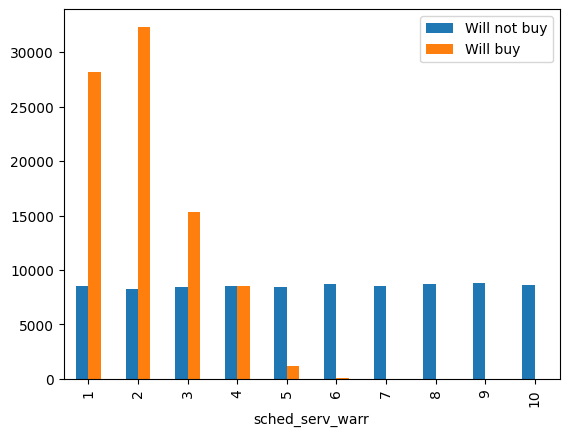

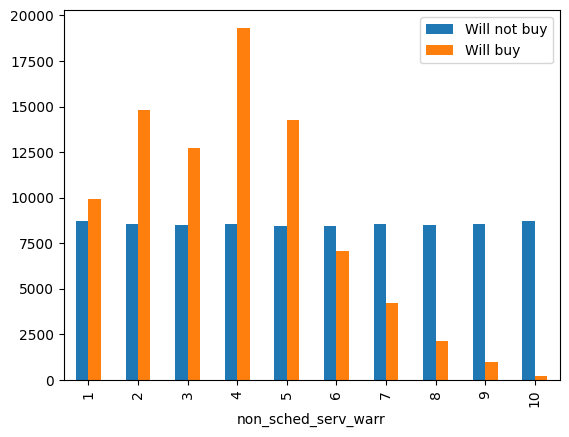

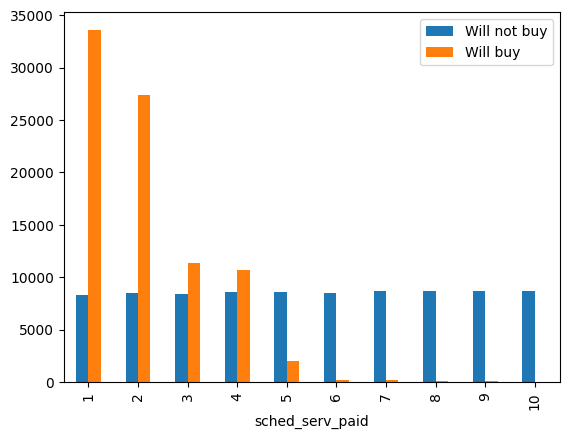

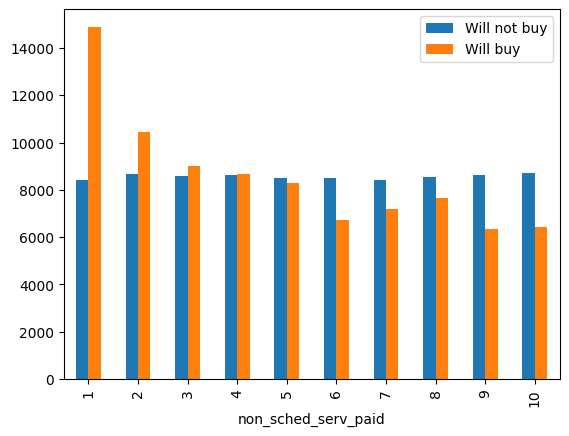

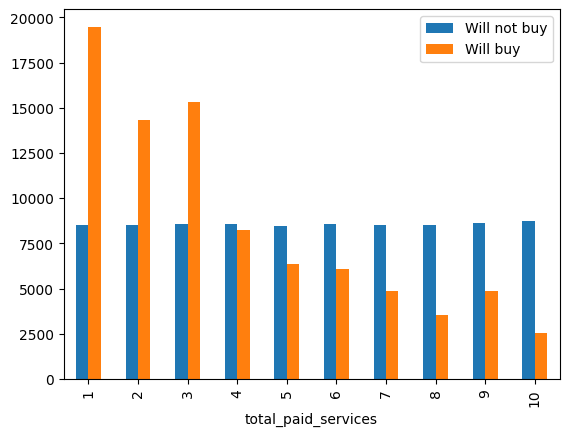

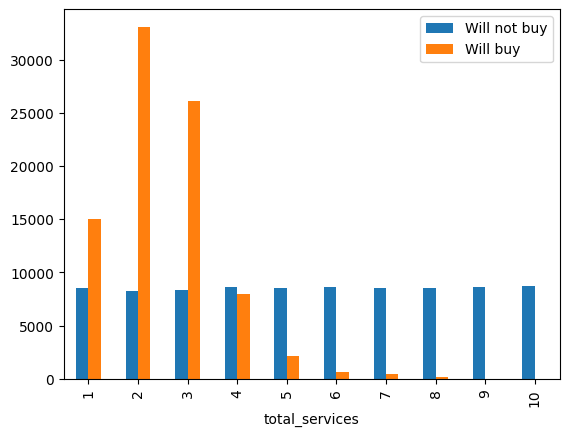

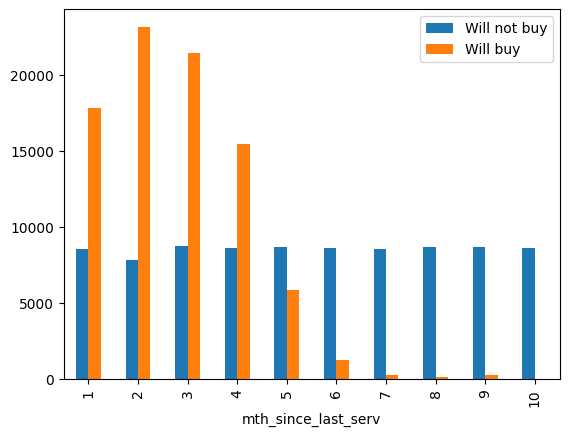

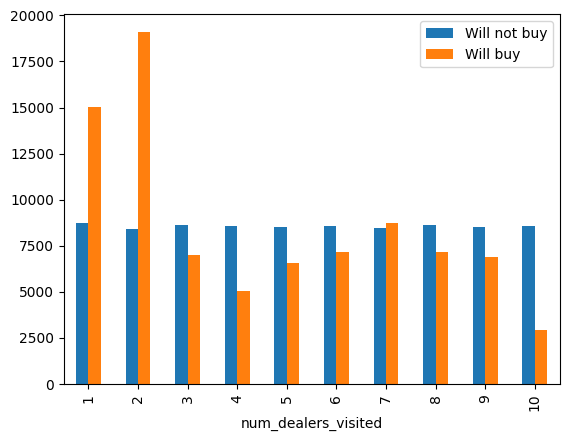

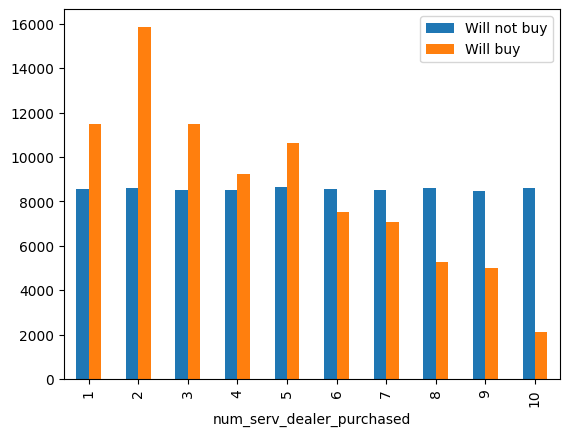

In [27]:
for col in X:
    df_serv=pd.DataFrame(df2_train[df2_train.Target==0].groupby(by=col).count().Target)
    df_serv.columns=[ 'Will not buy']
    df_serv['Will buy']=df2_train[df2_train.Target==1].groupby(by=col).count().Target
    df_serv.plot(kind='bar')


# 9. Feature Scaling

<p style="font-size:18px;">
   Feature scaling to bring all the features of the dataset to a similar scale or range of values.
</p>

In [28]:
# Feature Scaling using Standardization: range [0,1]
scaler = preprocessing.StandardScaler().fit(X_train_sm.append(X_test))
X_train_sm = scaler.transform(X_train_sm)
X_test = scaler.transform(X_test)

/var/folders/0h/j84rsdwd49jbw1_d04_c5b3r0000gn/T/ipykernel_78301/2812475265.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scaler = preprocessing.StandardScaler().fit(X_train_sm.append(X_test))


In [29]:
assert isinstance(X_train_sm, np.ndarray)
assert isinstance(X_test, np.ndarray)

# 10. Modelling and Evaluation

In [30]:
lr_model = LogisticRegression(random_state=0).fit(X_train_sm, y_train_sm)

In [31]:
y_pred=lr_model.predict(X_train_sm)

In [32]:
accuracy_score(y_train_sm, y_pred)

0.8341430940646095

In [33]:
score={}
score['Training']=accuracy_score(y_train_sm, y_pred)

In [34]:
y_pred=lr_model.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

0.7750219186931845

In [36]:
score['Testing']=accuracy_score(y_test, y_pred)

<p style="font-size:18px;">
    The bar graph below demonstrates that training and testing accuracy for logistic regression classification
</p>

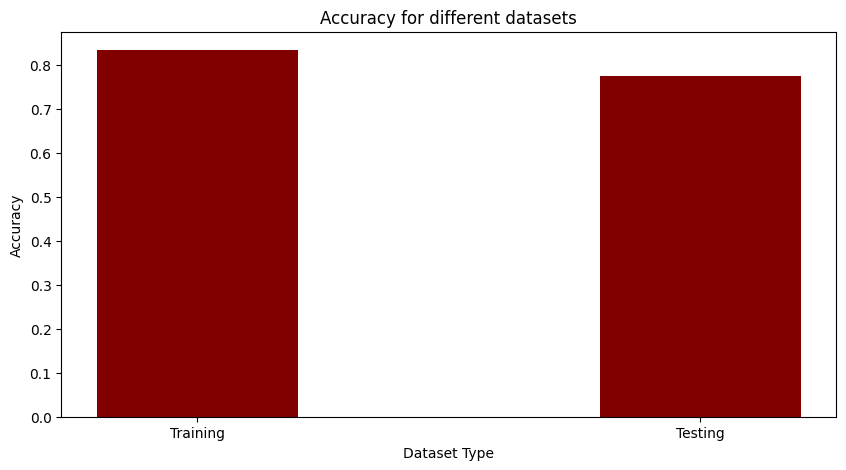

In [37]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(score.keys(), score.values(), color ='maroon',
        width = 0.4)
plt.xlabel("Dataset Type")
plt.ylabel("Accuracy")
plt.title('Accuracy for different datasets')
plt.show()

<p style="font-size:18px;">
    According to the classification report f-1 Score for positive class is insignificant
</p>

<p style="font-size:18px;">
    The precision value is less for the positive class and it suggests that a significant number of instances predicted to be positive for this class are actually false positives.
</p>

In [38]:
print(classification_report(y_test, y_pred, target_names=['Will not rebuy','Will rebuy']))

                precision    recall  f1-score   support

Will not rebuy       0.99      0.77      0.87     42194
    Will rebuy       0.09      0.84      0.16      1148

      accuracy                           0.78     43342
     macro avg       0.54      0.81      0.52     43342
  weighted avg       0.97      0.78      0.85     43342



## Checking feature importance for logistic regression

<p style="font-size:18px;">
    total_services has the highest coef value and 0 p-value so it is the most important feature for prediction
</p>

In [39]:
X_obs = sms.add_constant(pd.DataFrame(X_train_sm,columns=X.columns)) # add a constant intercept term
model = sms.Logit(y_train_sm, X_obs)
result = model.fit()

# print the summary table with coefficient and p-value information
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.364197
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:               171244
Model:                          Logit   Df Residuals:                   171234
Method:                           MLE   Df Model:                            9
Date:                Wed, 26 Apr 2023   Pseudo R-squ.:                  0.4746
Time:                        22:25:58   Log-Likelihood:                -62367.
converged:                       True   LL-Null:                   -1.1870e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.8514      0.010    -83.991      0.000      -0.

<p style="font-size:18px;">
    List of hyperparameters of the logistic regression model
</p>

In [40]:
lr_model.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}